In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
target_column = 'total_UPDRS'
feature_cols = [col for col in train_df.columns if col not in ['subject#', target_column]]

In [4]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [5]:
scaler_X.fit(train_df[feature_cols])
scaler_y.fit(train_df[[target_column]])

MinMaxScaler()

In [6]:
scaled_train_df = train_df.copy()
scaled_test_df = test_df.copy()

In [7]:
scaled_train_df[feature_cols] = scaler_X.transform(scaled_train_df[feature_cols])
scaled_train_df[[target_column]] = scaler_y.transform(scaled_train_df[[target_column]])

scaled_test_df[feature_cols] = scaler_X.transform(scaled_test_df[feature_cols])
scaled_test_df[[target_column]] = scaler_y.transform(scaled_test_df[[target_column]])

In [8]:
timesteps = 10
prediction_length = 5
X_sequences, y_sequences = [], []

for pid, group in scaled_train_df.groupby('subject#'):
    if len(group) >= timesteps + prediction_length:
        for i in range(len(group) - timesteps - prediction_length + 1):
            seq_x = group.iloc[i:i+timesteps][feature_cols].values
            seq_y = group.iloc[i+timesteps:i+timesteps+prediction_length][target_column].values
            X_sequences.append(seq_x)
            y_sequences.append(seq_y)

X = np.array(X_sequences)
y = np.array(y_sequences)

In [9]:
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(timesteps, len(feature_cols))),
    Dense(32, activation='relu'),
    Dense(prediction_length)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer=Adam(), loss='mse')

In [11]:
history = model.fit(X, y, epochs=30, batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0260 - val_loss: 0.0141
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0036 - val_loss: 0.0190
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028 - val_loss: 0.0134
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0164
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017 - val_loss: 0.0128
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014 - val_loss: 0.0122
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - val_loss: 0.0070
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - val_loss: 0.0075
Epoch 9/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.5563e-04 - val_loss: 0.0085
Epoch 10/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.8457e-04 - val_loss: 0.0064
Epoch 11/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.6264e-04 - val_loss: 0.0057
Epoch 12/30
219/219 ━━━━━━━━━━━━━━━━━━━

In [12]:
model.save("neur_RNN.keras")



Subject 1 — MSE: 0.284
  Actual = 47.970, Predicted = 47.404
  Actual = 47.970, Predicted = 47.457
  Actual = 47.970, Predicted = 47.500
  Actual = 47.970, Predicted = 47.200
  Actual = 47.970, Predicted = 47.825


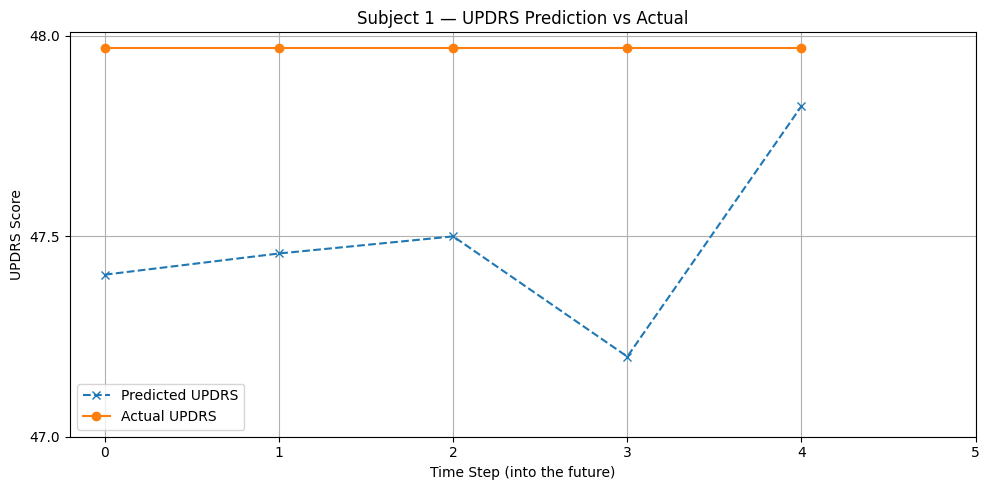


Subject 2 — MSE: 0.352
  Actual = 21.650, Predicted = 21.100
  Actual = 21.650, Predicted = 20.979
  Actual = 21.650, Predicted = 21.127
  Actual = 21.650, Predicted = 21.136
  Actual = 21.650, Predicted = 20.963


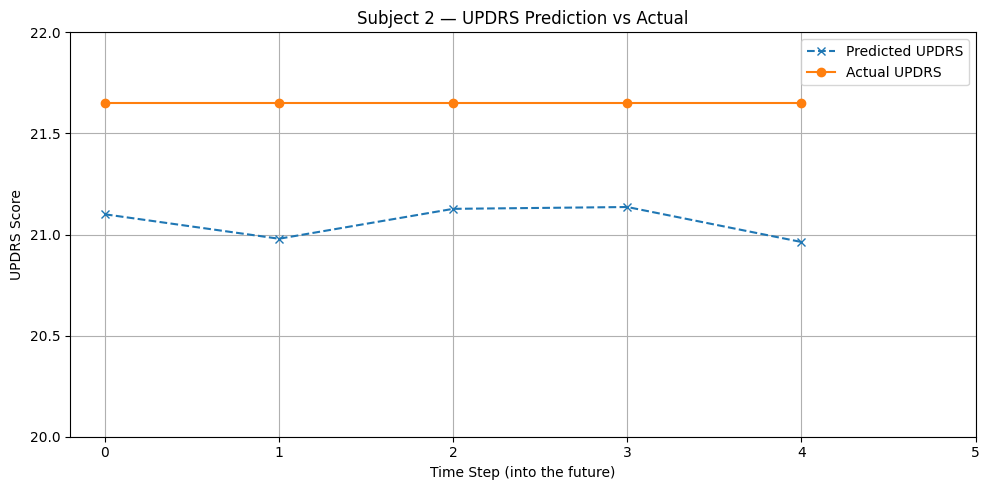


Subject 3 — MSE: 2.098
  Actual = 39.947, Predicted = 38.362
  Actual = 39.947, Predicted = 38.585
  Actual = 39.947, Predicted = 38.161
  Actual = 39.947, Predicted = 38.648
  Actual = 39.947, Predicted = 38.829


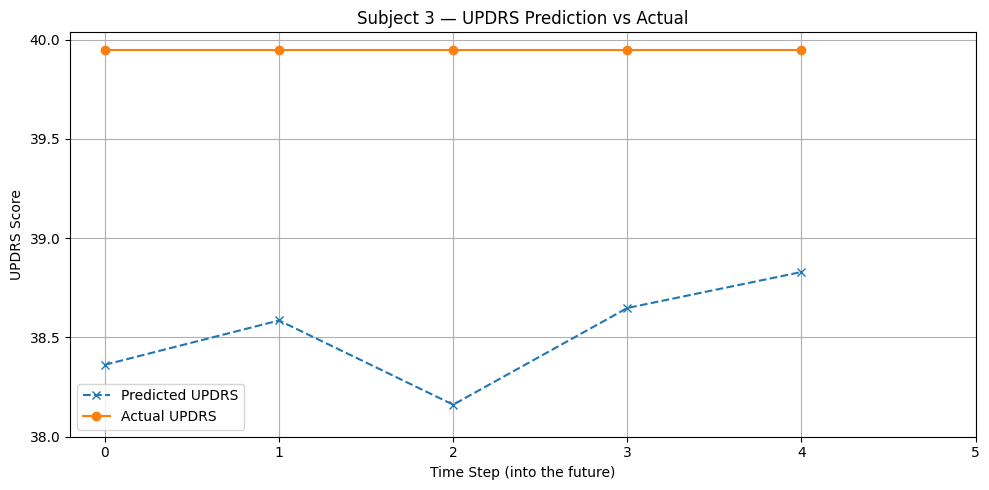


Subject 4 — MSE: 0.484
  Actual = 27.770, Predicted = 28.623
  Actual = 27.770, Predicted = 28.466
  Actual = 27.770, Predicted = 28.347
  Actual = 27.770, Predicted = 28.226
  Actual = 27.770, Predicted = 28.587


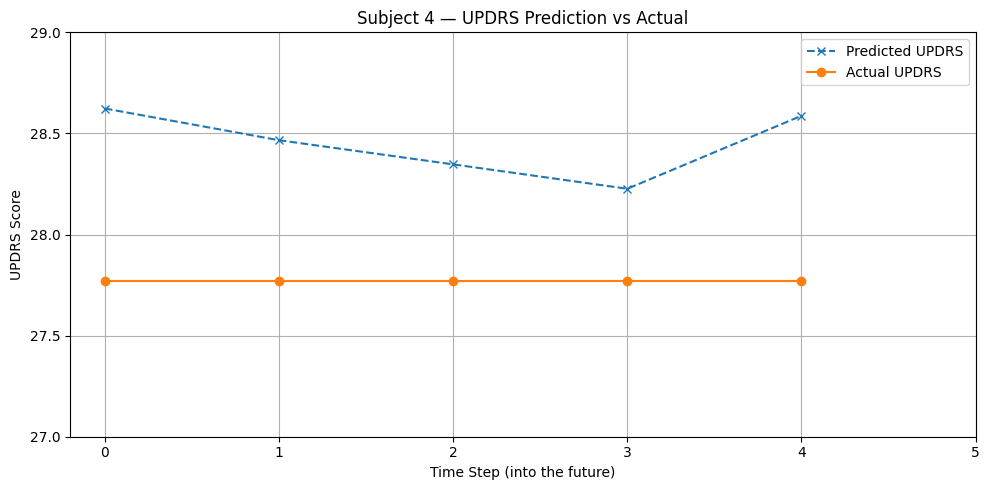


Subject 5 — MSE: 2.552
  Actual = 44.761, Predicted = 46.349
  Actual = 44.761, Predicted = 46.204
  Actual = 44.761, Predicted = 46.428
  Actual = 44.761, Predicted = 46.027
  Actual = 44.761, Predicted = 46.705


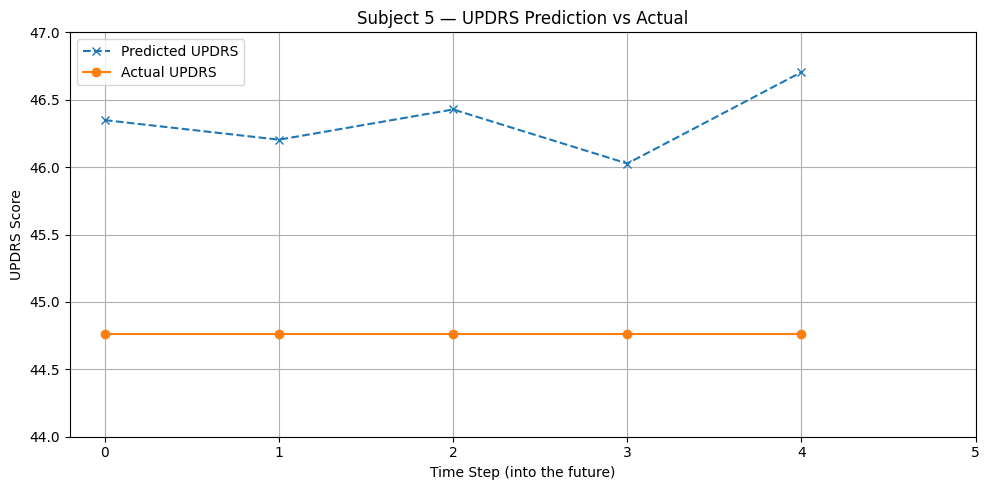


Subject 6 — MSE: 0.482
  Actual = 45.956, Predicted = 45.052
  Actual = 45.956, Predicted = 45.225
  Actual = 45.956, Predicted = 45.625
  Actual = 45.956, Predicted = 44.980
  Actual = 45.956, Predicted = 45.966


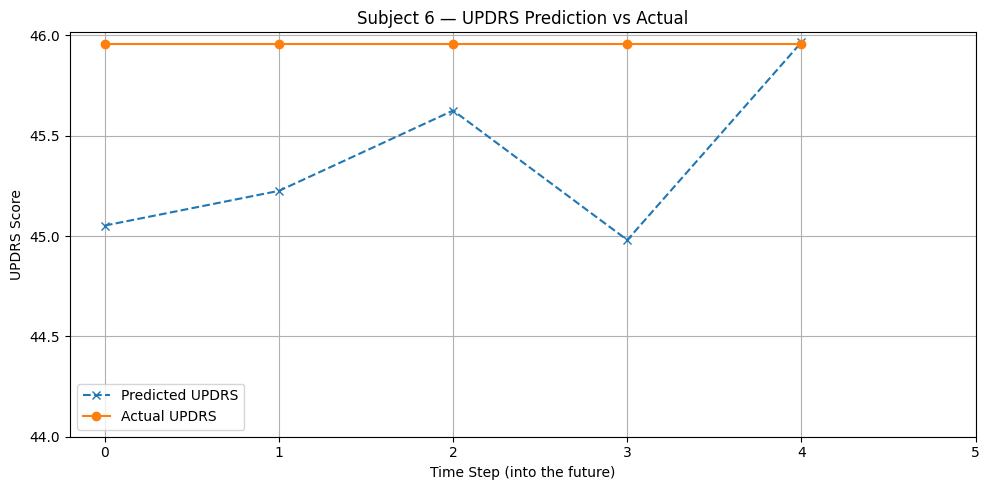


Subject 7 — MSE: 5.747
  Actual = 19.051, Predicted = 21.311
  Actual = 19.051, Predicted = 21.694
  Actual = 19.051, Predicted = 21.309
  Actual = 19.051, Predicted = 21.315
  Actual = 19.050, Predicted = 21.584


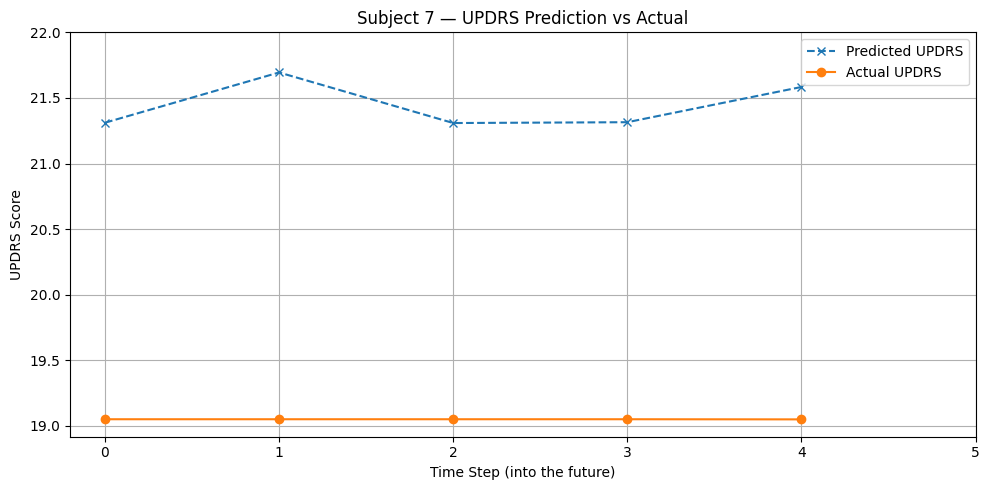


Subject 8 — MSE: 7.679
  Actual = 29.031, Predicted = 31.725
  Actual = 29.031, Predicted = 31.838
  Actual = 29.031, Predicted = 31.625
  Actual = 29.031, Predicted = 31.566
  Actual = 29.031, Predicted = 32.209


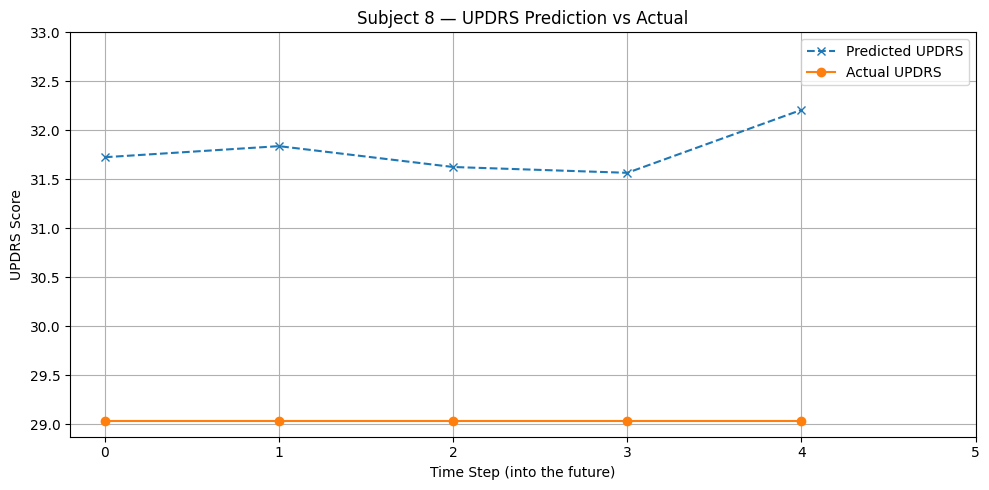


Subject 9 — MSE: 0.278
  Actual = 26.897, Predicted = 26.357
  Actual = 26.897, Predicted = 26.297
  Actual = 26.897, Predicted = 26.651
  Actual = 26.897, Predicted = 26.320
  Actual = 26.897, Predicted = 26.308


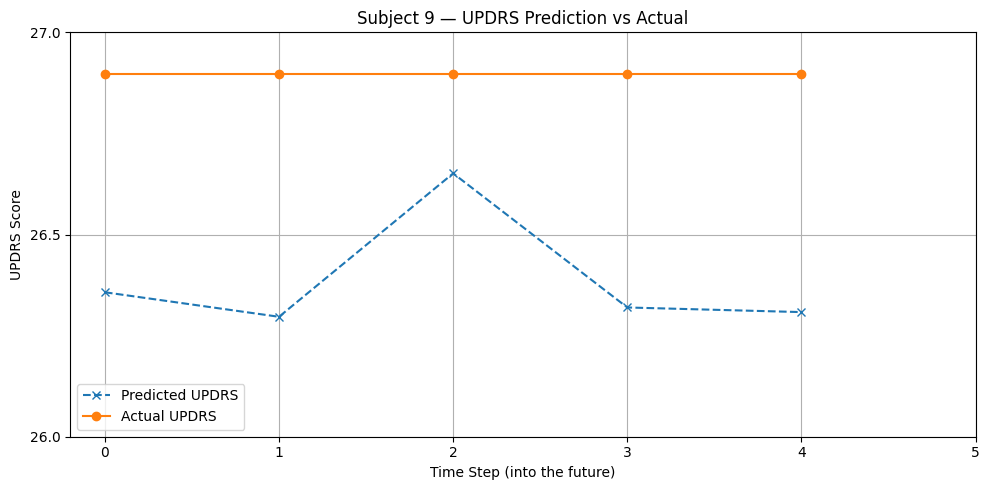


Subject 10 — MSE: 0.584
  Actual = 21.922, Predicted = 22.444
  Actual = 21.922, Predicted = 22.489
  Actual = 21.922, Predicted = 22.904
  Actual = 21.922, Predicted = 22.480
  Actual = 21.922, Predicted = 22.948


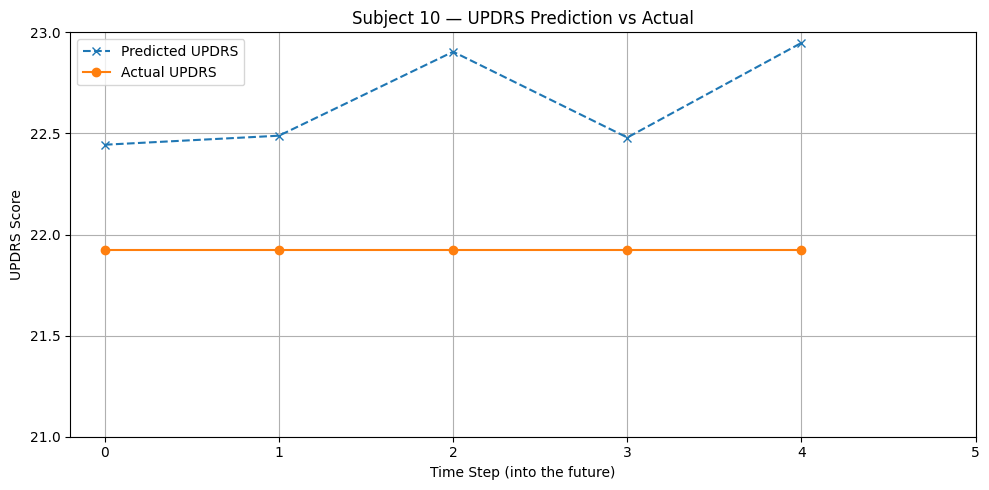


Subject 11 — MSE: 0.892
  Actual = 19.237, Predicted = 18.006
  Actual = 19.237, Predicted = 18.093
  Actual = 19.237, Predicted = 18.835
  Actual = 19.237, Predicted = 18.379
  Actual = 19.237, Predicted = 18.378


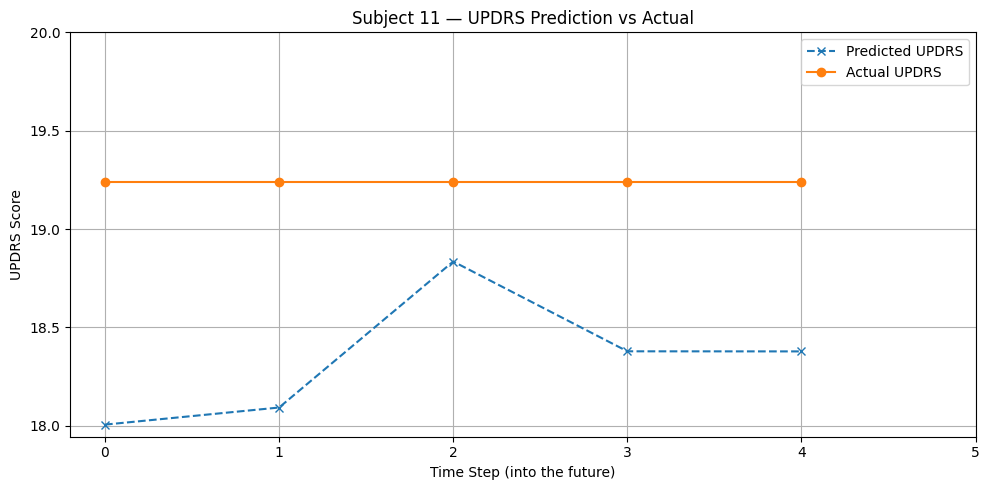

Subject 12 — Insufficient data (need 15, have 7)
Subject 13 — Insufficient data (need 15, have 12)

Subject 14 — MSE: 0.106
  Actual = 25.418, Predicted = 25.068
  Actual = 25.418, Predicted = 25.401
  Actual = 25.419, Predicted = 24.961
  Actual = 25.419, Predicted = 25.224
  Actual = 25.419, Predicted = 25.018


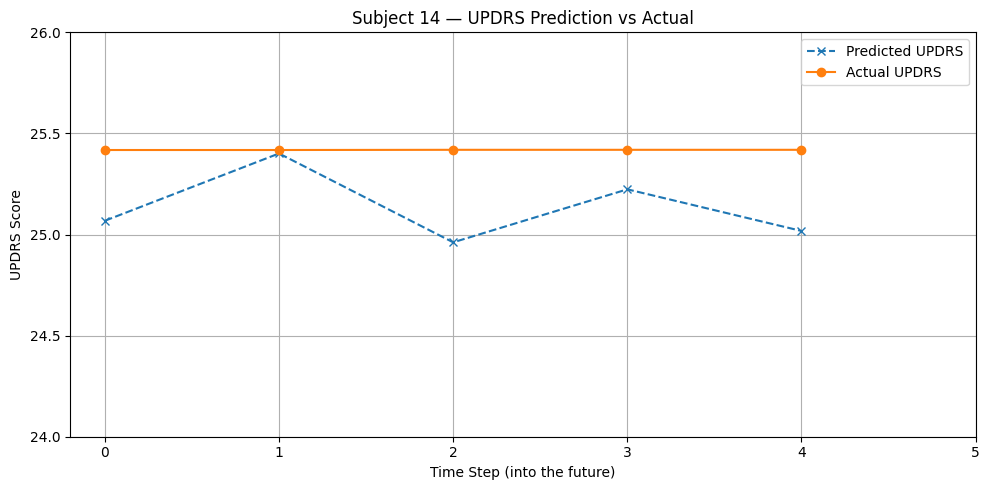


Subject 15 — MSE: 0.140
  Actual = 23.132, Predicted = 22.436
  Actual = 23.132, Predicted = 22.871
  Actual = 23.132, Predicted = 23.254
  Actual = 23.132, Predicted = 22.800
  Actual = 23.132, Predicted = 22.989


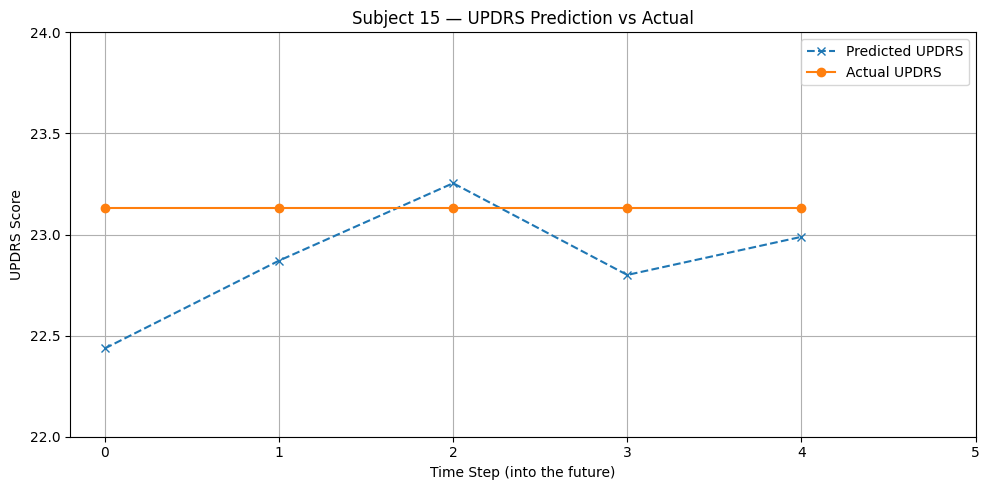


Subject 16 — MSE: 2.000
  Actual = 23.105, Predicted = 21.349
  Actual = 23.105, Predicted = 21.651
  Actual = 23.105, Predicted = 21.876
  Actual = 23.105, Predicted = 21.740
  Actual = 23.105, Predicted = 21.909


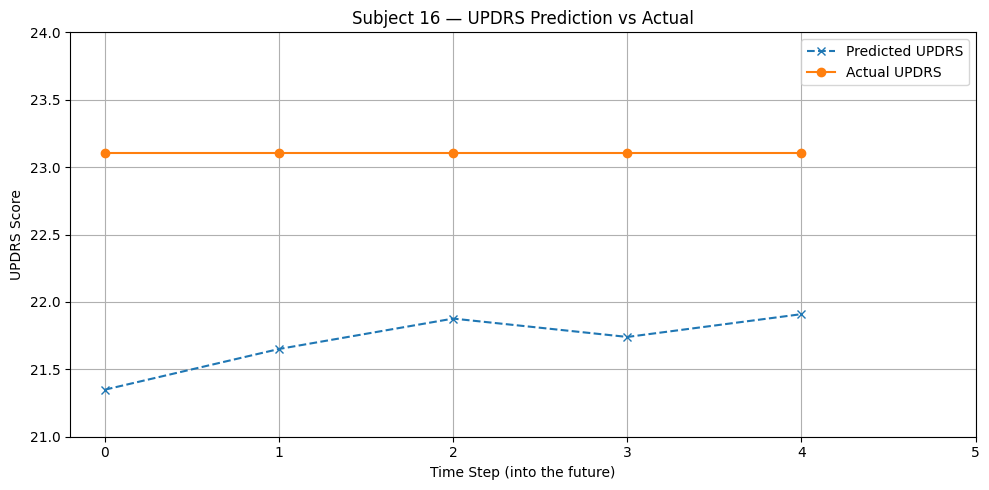


Subject 17 — MSE: 27.300
  Actual = 24.522, Predicted = 29.410
  Actual = 24.522, Predicted = 29.699
  Actual = 24.521, Predicted = 30.050
  Actual = 24.522, Predicted = 29.589
  Actual = 24.521, Predicted = 29.958


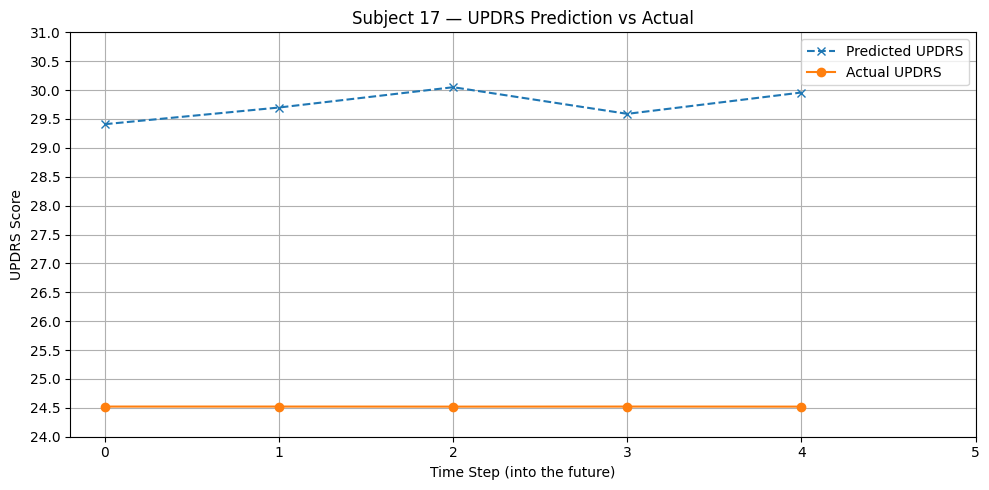


Subject 18 — MSE: 0.244
  Actual = 7.000, Predicted = 7.604
  Actual = 7.000, Predicted = 7.344
  Actual = 7.000, Predicted = 7.464
  Actual = 7.000, Predicted = 7.477
  Actual = 7.000, Predicted = 7.544


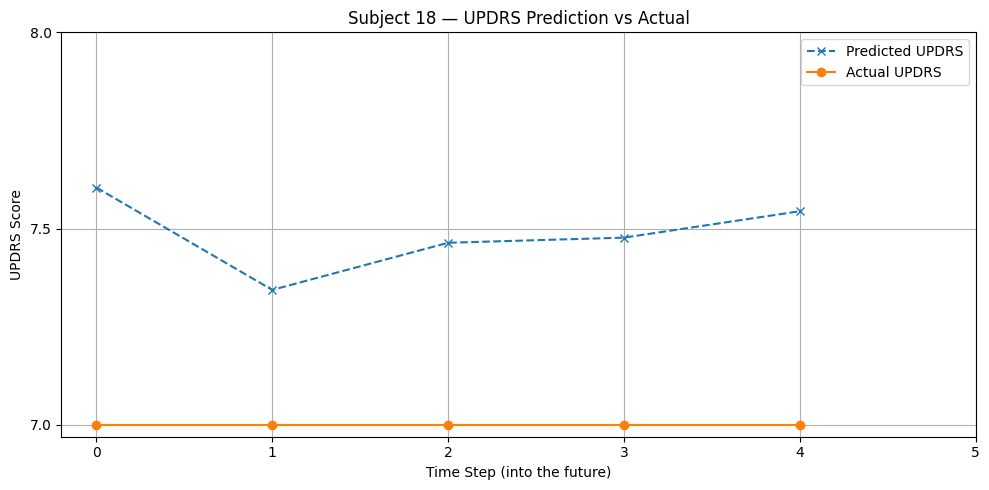


Subject 19 — MSE: 0.727
  Actual = 26.002, Predicted = 26.563
  Actual = 26.002, Predicted = 26.520
  Actual = 26.002, Predicted = 27.152
  Actual = 26.002, Predicted = 26.865
  Actual = 26.002, Predicted = 26.993


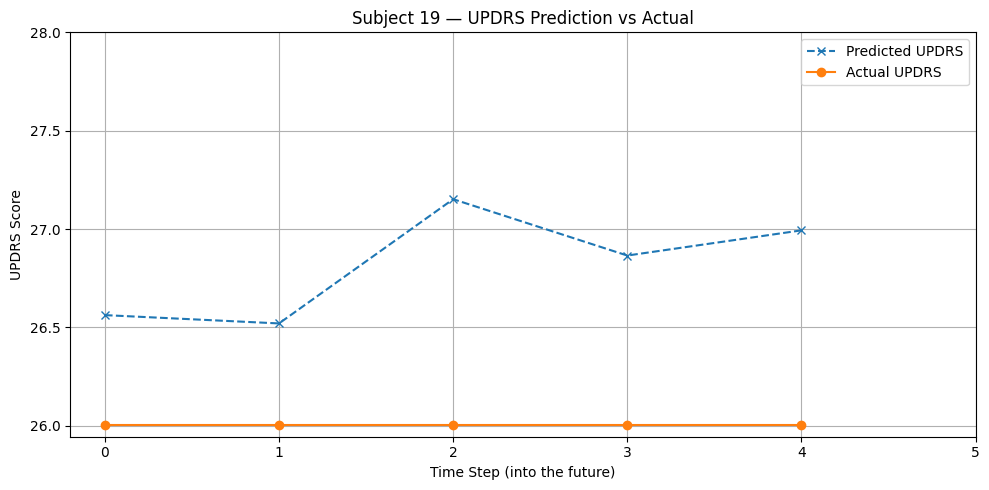


Subject 20 — MSE: 4.858
  Actual = 16.974, Predicted = 18.937
  Actual = 16.974, Predicted = 18.911
  Actual = 16.974, Predicted = 19.567
  Actual = 16.974, Predicted = 19.319
  Actual = 16.974, Predicted = 19.087


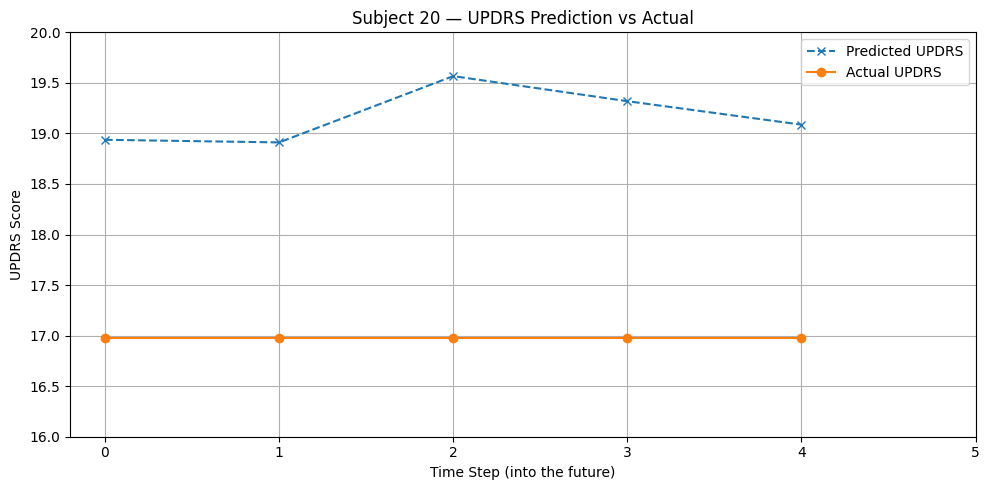

Subject 21 — Insufficient data (need 15, have 13)
Subject 22 — Insufficient data (need 15, have 12)

Subject 23 — MSE: 1.338
  Actual = 26.107, Predicted = 24.429
  Actual = 26.107, Predicted = 24.933
  Actual = 26.107, Predicted = 24.973
  Actual = 26.107, Predicted = 25.193
  Actual = 26.107, Predicted = 25.495


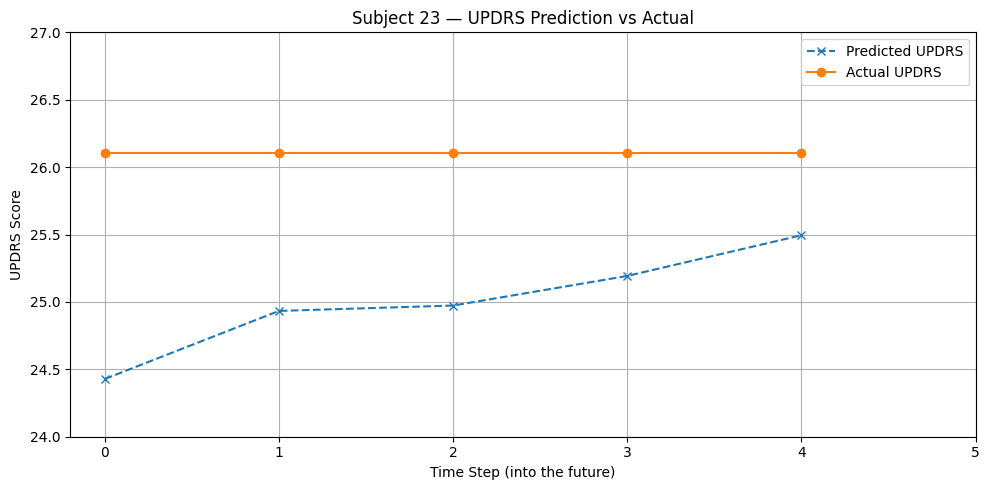


Subject 24 — MSE: 1.137
  Actual = 19.974, Predicted = 21.029
  Actual = 19.974, Predicted = 20.496
  Actual = 19.974, Predicted = 21.410
  Actual = 19.974, Predicted = 20.792
  Actual = 19.974, Predicted = 21.227


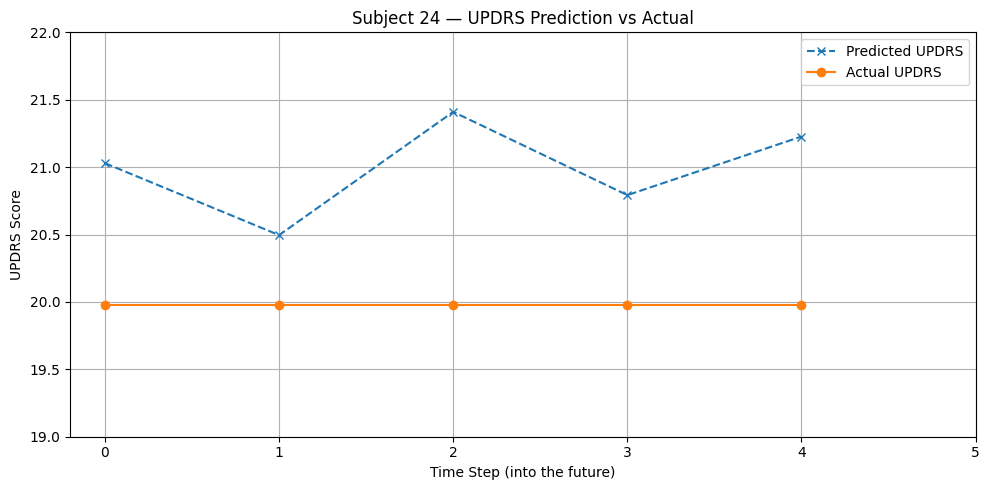


Subject 25 — MSE: 0.962
  Actual = 53.960, Predicted = 54.884
  Actual = 53.960, Predicted = 54.883
  Actual = 53.960, Predicted = 54.749
  Actual = 53.960, Predicted = 54.733
  Actual = 53.960, Predicted = 55.333


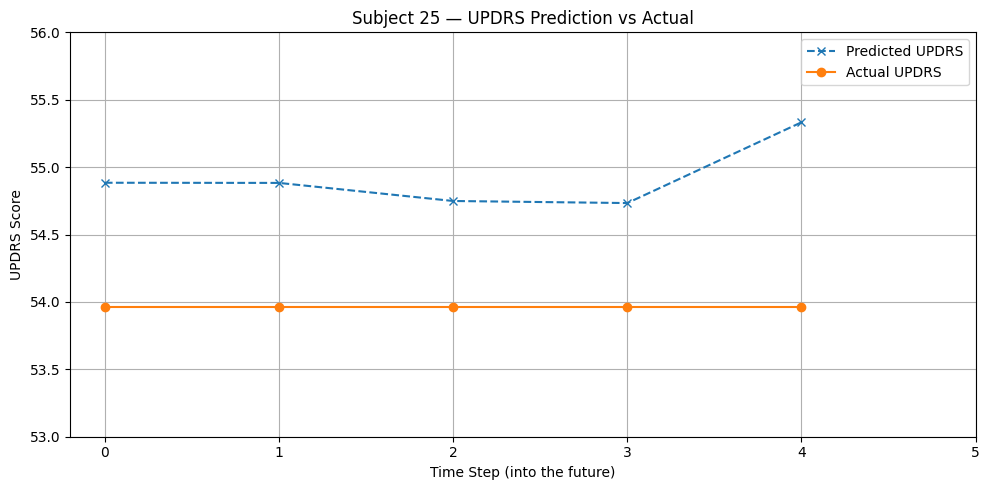


Subject 26 — MSE: 6.757
  Actual = 25.011, Predicted = 27.825
  Actual = 25.010, Predicted = 27.390
  Actual = 25.011, Predicted = 27.680
  Actual = 25.010, Predicted = 27.361
  Actual = 25.010, Predicted = 27.757


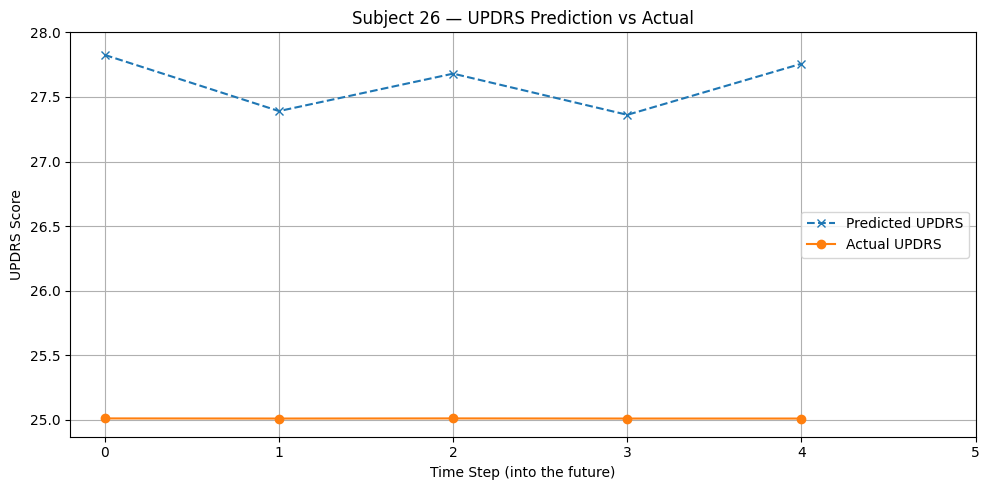


Subject 27 — MSE: 1.348
  Actual = 18.698, Predicted = 19.727
  Actual = 18.979, Predicted = 19.416
  Actual = 18.979, Predicted = 20.644
  Actual = 18.979, Predicted = 19.427
  Actual = 18.979, Predicted = 20.566


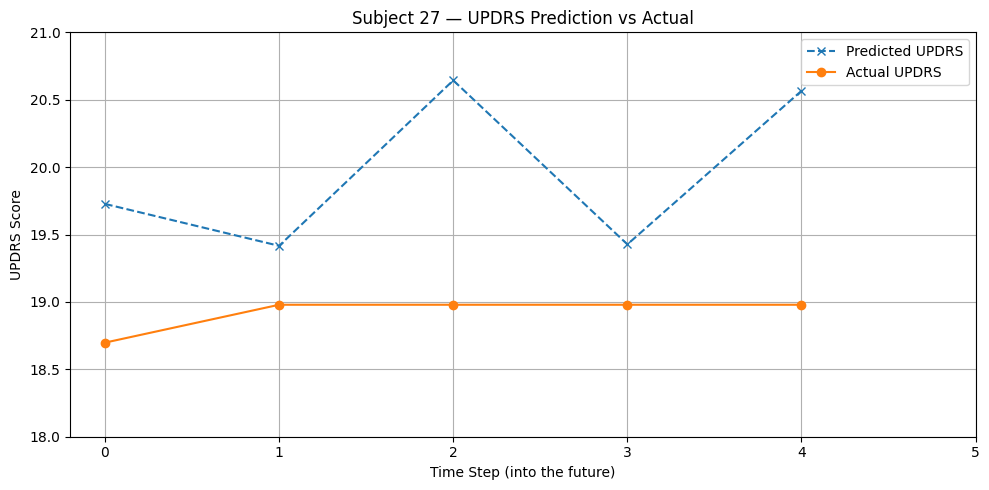


Subject 28 — MSE: 14.749
  Actual = 25.767, Predicted = 29.692
  Actual = 25.767, Predicted = 29.776
  Actual = 25.767, Predicted = 29.316
  Actual = 25.767, Predicted = 29.261
  Actual = 25.767, Predicted = 29.946


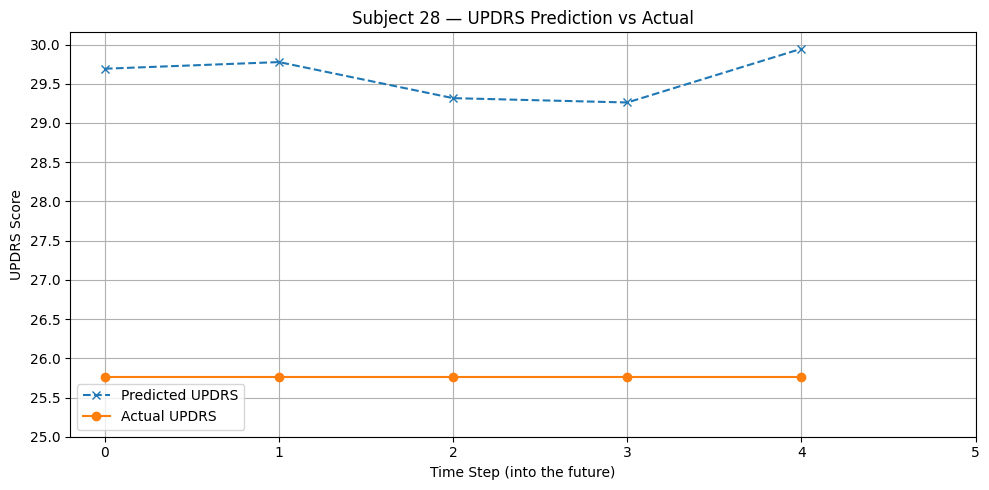


Subject 29 — MSE: 2.962
  Actual = 34.581, Predicted = 33.426
  Actual = 34.581, Predicted = 33.072
  Actual = 34.581, Predicted = 32.438
  Actual = 34.581, Predicted = 32.420
  Actual = 34.581, Predicted = 33.190


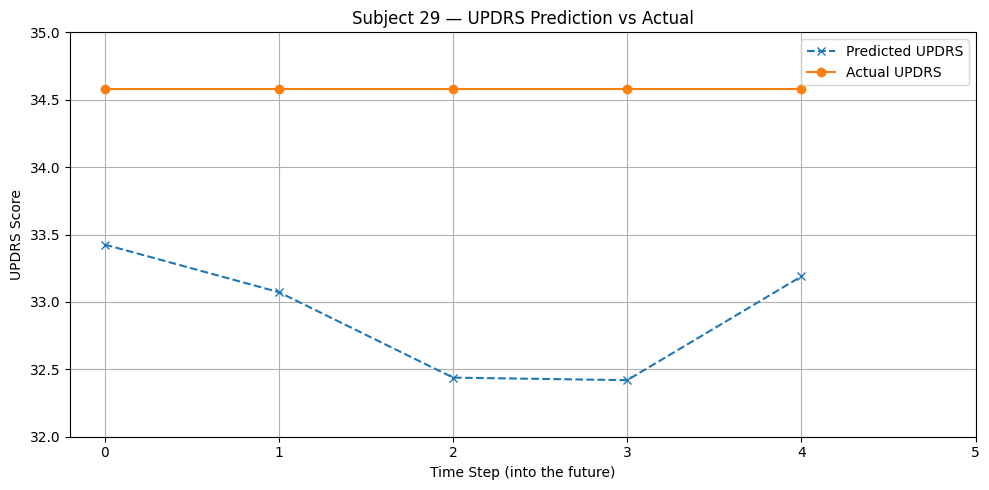


Subject 30 — MSE: 0.796
  Actual = 29.477, Predicted = 30.343
  Actual = 29.477, Predicted = 30.419
  Actual = 29.476, Predicted = 30.430
  Actual = 29.476, Predicted = 30.171
  Actual = 29.476, Predicted = 30.451


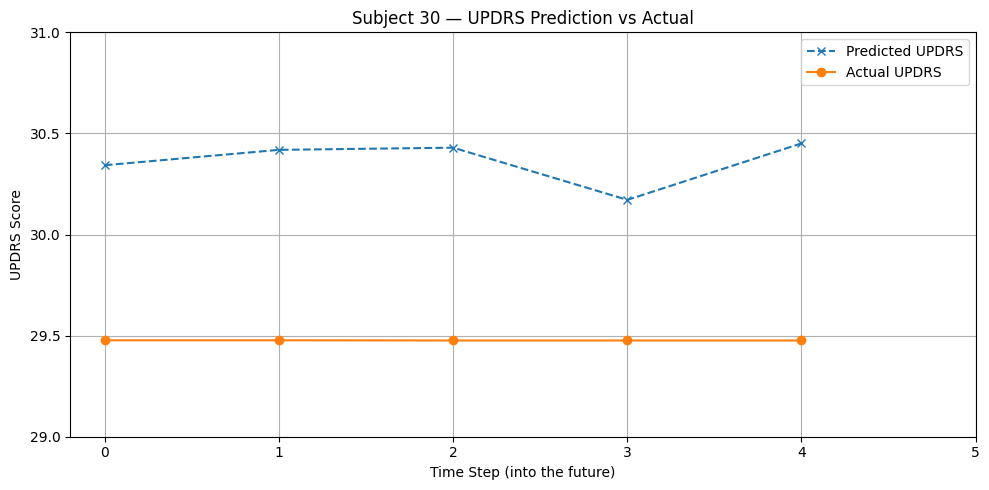


Subject 31 — MSE: 24.942
  Actual = 22.392, Predicted = 27.295
  Actual = 22.392, Predicted = 27.369
  Actual = 22.392, Predicted = 27.432
  Actual = 22.392, Predicted = 27.408
  Actual = 22.392, Predicted = 27.425


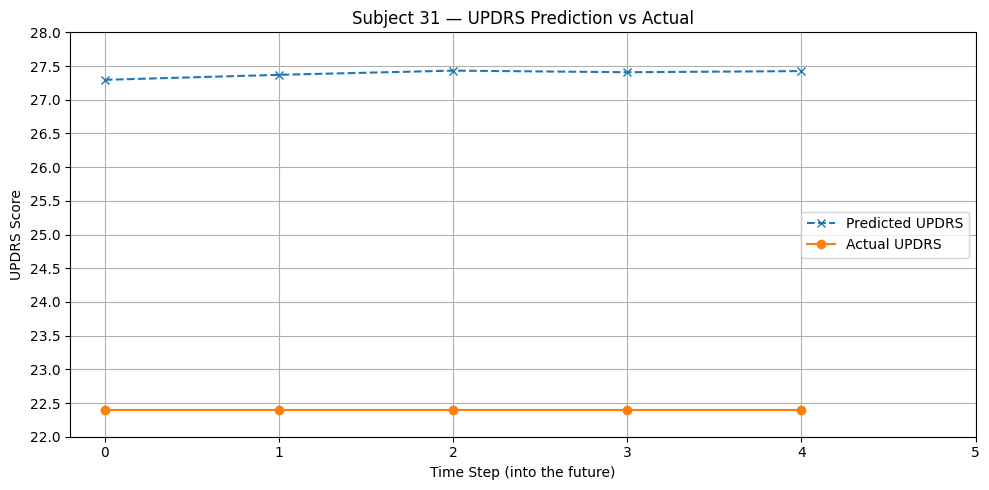

Subject 32 — Insufficient data (need 15, have 1)

Subject 33 — MSE: 8.938
  Actual = 32.000, Predicted = 34.967
  Actual = 32.000, Predicted = 34.800
  Actual = 32.000, Predicted = 35.158
  Actual = 32.000, Predicted = 34.638
  Actual = 32.000, Predicted = 35.334


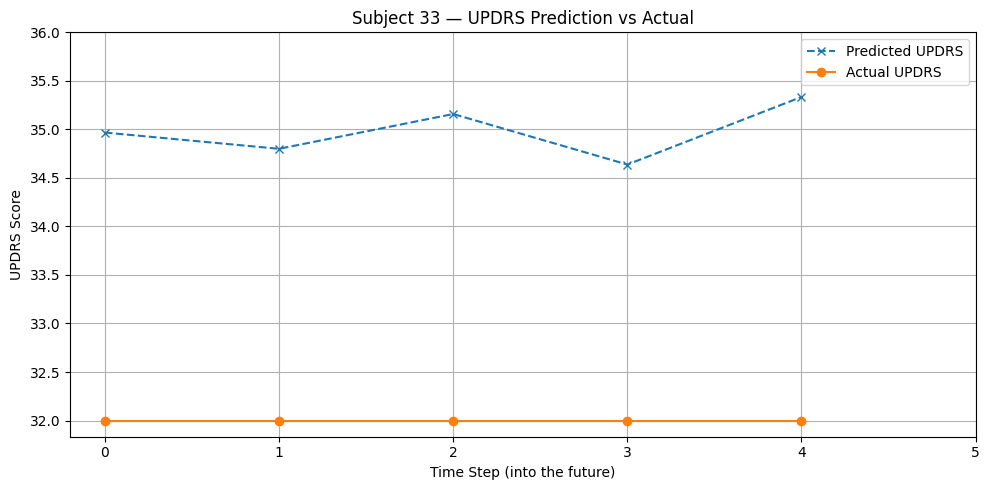


Subject 34 — MSE: 1.007
  Actual = 34.817, Predicted = 35.955
  Actual = 34.817, Predicted = 35.915
  Actual = 34.817, Predicted = 35.706
  Actual = 34.817, Predicted = 35.524
  Actual = 34.817, Predicted = 35.932


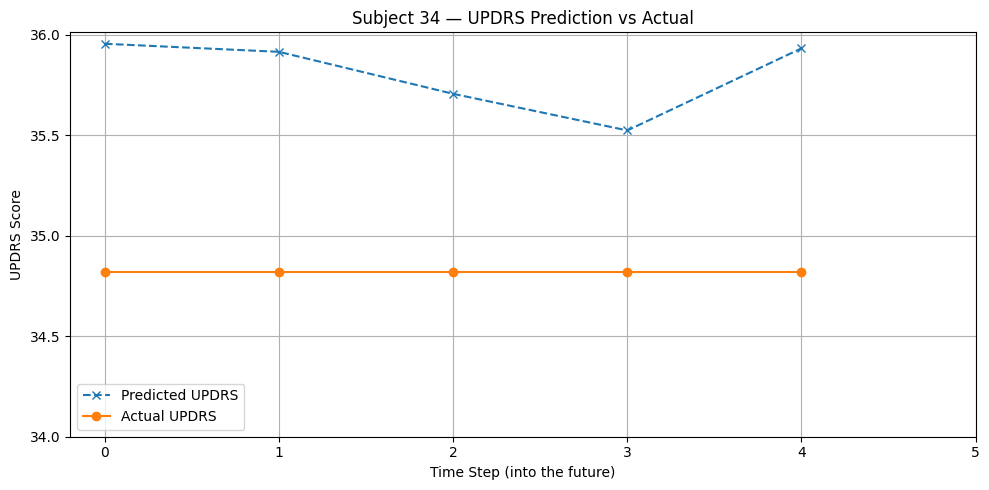


Subject 35 — MSE: 18.317
  Actual = 53.109, Predicted = 48.751
  Actual = 53.109, Predicted = 48.632
  Actual = 53.109, Predicted = 49.166
  Actual = 53.109, Predicted = 48.198
  Actual = 53.109, Predicted = 49.519


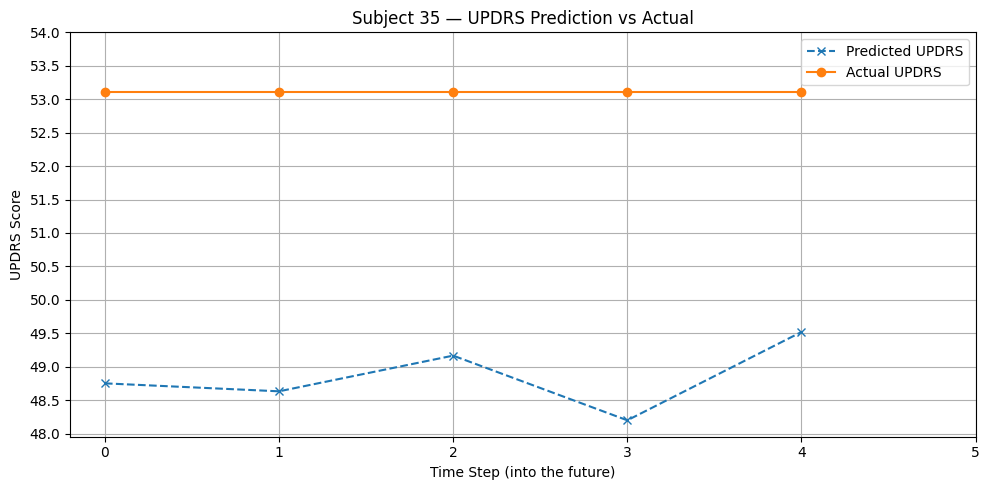


Subject 36 — MSE: 14.521
  Actual = 32.000, Predicted = 29.138
  Actual = 32.000, Predicted = 29.159
  Actual = 32.000, Predicted = 27.542
  Actual = 32.000, Predicted = 27.014
  Actual = 32.000, Predicted = 28.592


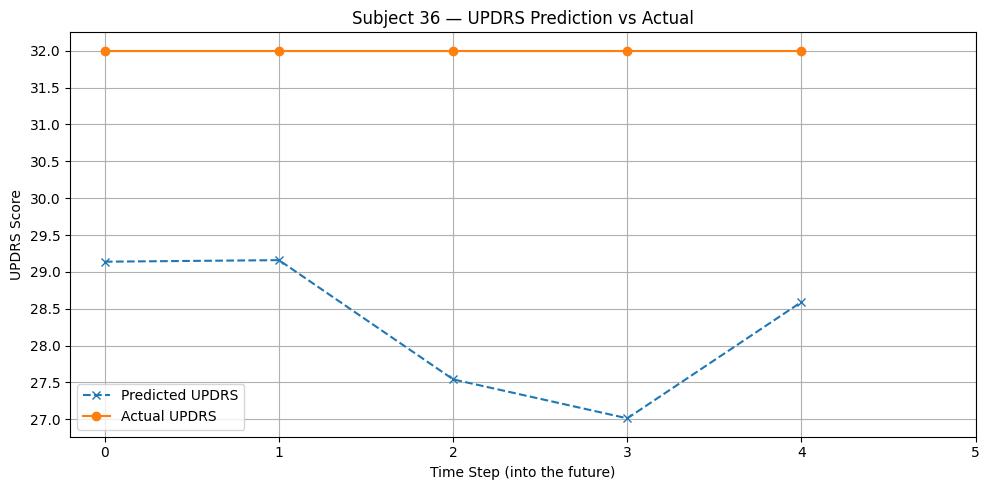


Subject 37 — MSE: 19.764
  Actual = 48.530, Predicted = 43.673
  Actual = 48.530, Predicted = 44.300
  Actual = 48.530, Predicted = 44.175
  Actual = 48.530, Predicted = 44.482
  Actual = 48.530, Predicted = 43.842


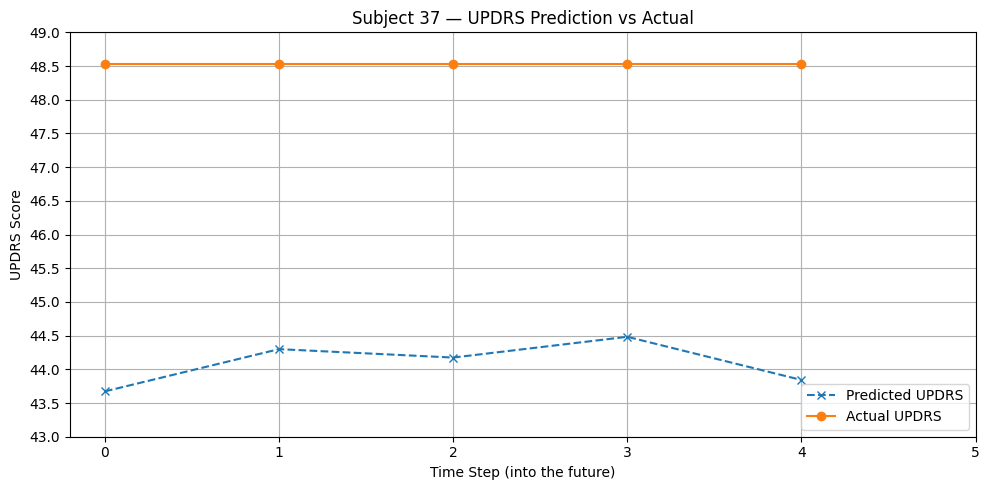


Subject 38 — MSE: 1.623
  Actual = 26.218, Predicted = 27.781
  Actual = 26.218, Predicted = 27.410
  Actual = 26.218, Predicted = 27.548
  Actual = 26.218, Predicted = 27.176
  Actual = 26.218, Predicted = 27.470


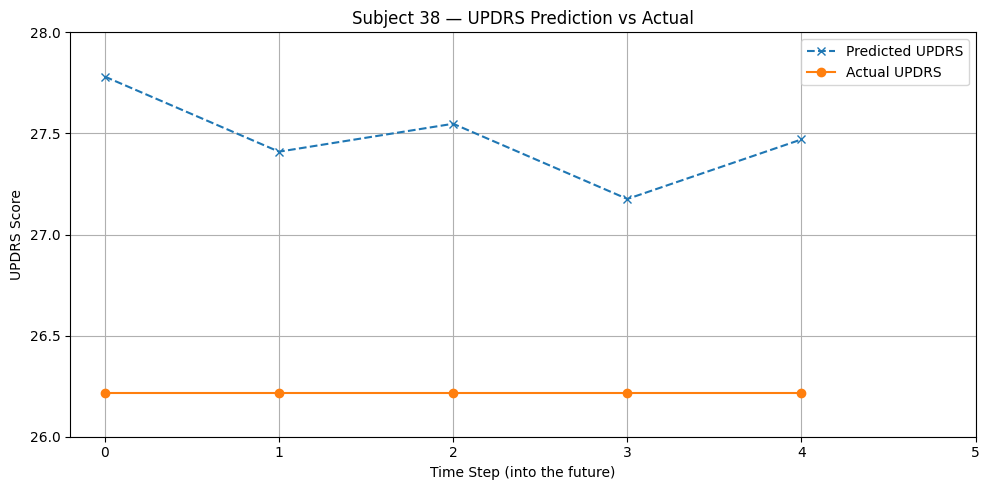


Subject 39 — MSE: 11.755
  Actual = 44.298, Predicted = 47.649
  Actual = 44.298, Predicted = 47.777
  Actual = 44.298, Predicted = 47.966
  Actual = 44.298, Predicted = 47.320
  Actual = 44.298, Predicted = 47.883


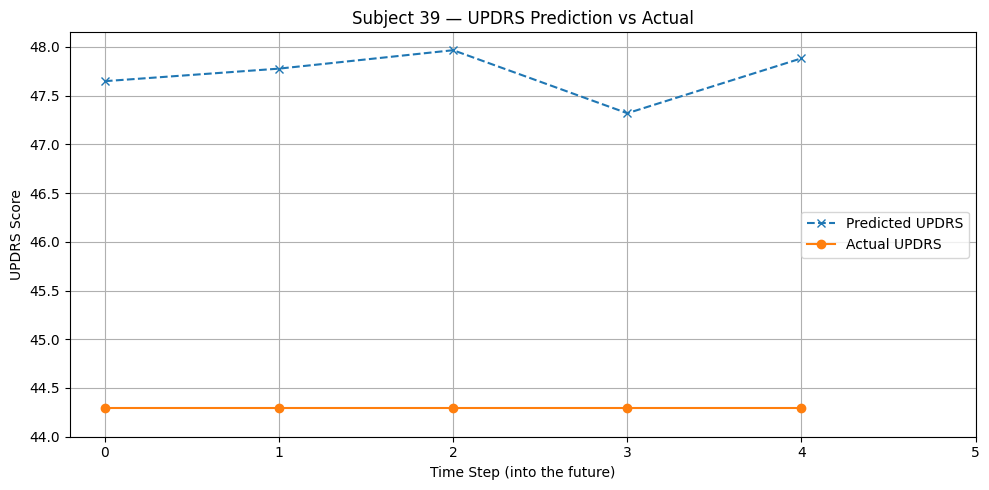


Subject 40 — MSE: 30.642
  Actual = 22.349, Predicted = 27.501
  Actual = 22.349, Predicted = 27.431
  Actual = 22.349, Predicted = 28.658
  Actual = 22.349, Predicted = 26.871
  Actual = 22.349, Predicted = 28.720


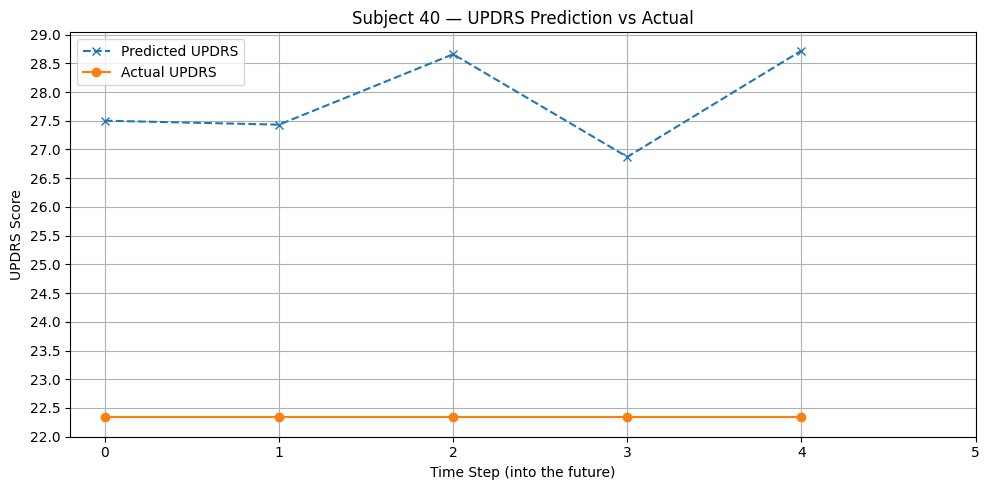


Subject 41 — MSE: 16.880
  Actual = 42.514, Predicted = 38.576
  Actual = 42.514, Predicted = 38.426
  Actual = 42.515, Predicted = 38.435
  Actual = 42.515, Predicted = 37.838
  Actual = 42.514, Predicted = 38.817


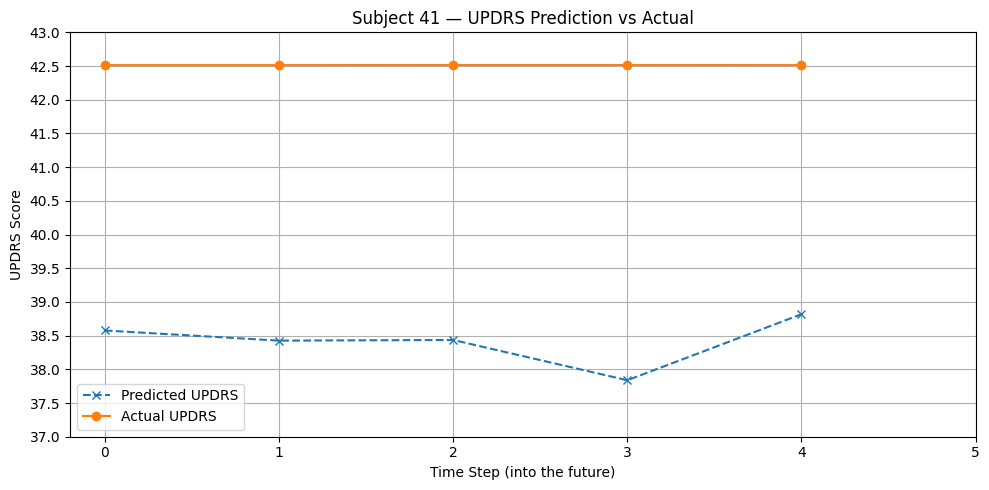


Subject 42 — MSE: 23.280
  Actual = 31.513, Predicted = 26.745
  Actual = 31.513, Predicted = 26.771
  Actual = 31.513, Predicted = 26.935
  Actual = 31.513, Predicted = 26.419
  Actual = 31.513, Predicted = 26.586


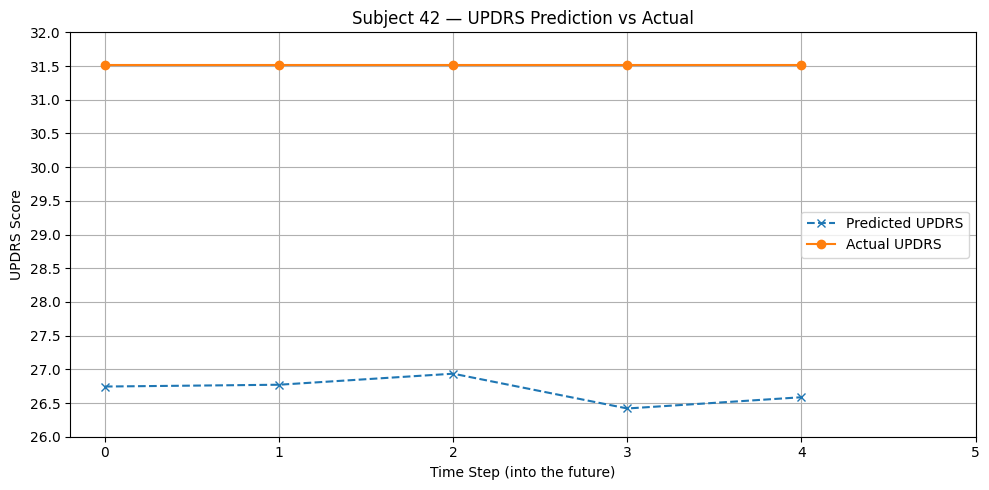

In [13]:
for pid, group in scaled_test_df.groupby('subject#'):
    group_features = group[feature_cols].values
    group_target = group[[target_column]].values

    if len(group) < timesteps + prediction_length:
        print(f"Subject {pid} — Insufficient data (need {timesteps + prediction_length}, have {len(group)})")
        continue

    input_seq = group_features[-(timesteps + prediction_length):-prediction_length]
    actual_scaled = group_target[-prediction_length:]

    input_seq = input_seq.reshape(1, timesteps, -1)
    pred_scaled = model.predict(input_seq, verbose=0)[0].reshape(-1, 1)

    predicted_values = scaler_y.inverse_transform(pred_scaled).flatten()
    actual_values = scaler_y.inverse_transform(actual_scaled).flatten()

    plt.figure(figsize=(10, 5))
    time_steps = np.arange(len(predicted_values))
    plt.plot(time_steps, predicted_values, label='Predicted UPDRS', marker='x', linestyle='--')
    plt.plot(time_steps, actual_values, label='Actual UPDRS', marker='o', linestyle='-')

    y_min = min(np.min(predicted_values), np.min(actual_values))
    y_max = max(np.max(predicted_values), np.max(actual_values))
    plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 0.5, 0.5))
    plt.xticks(np.arange(0, len(predicted_values) + 1, 1.0))
    plt.title(f"Subject {pid} — UPDRS Prediction vs Actual")
    plt.xlabel("Time Step (into the future)")
    plt.ylabel("UPDRS Score")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    mse = mean_squared_error(actual_values, predicted_values)
    print(f"\nSubject {pid} — MSE: {mse:.3f}")
    for i, (a, p) in enumerate(zip(actual_values, predicted_values)):
        print(f"  Actual = {a:.3f}, Predicted = {p:.3f}")

    plt.show()


In [14]:
mse_by_category = {
    '0-1': {}, '1-2': {}, '2-3': {}, '3-5': {}, '>5': {}
}

for subject_id, group in scaled_test_df.groupby('subject#'):
    group_features = group[feature_cols].values
    group_target_scaled = group[[target_column]].values

    if len(group) < timesteps + prediction_length:
        continue

    input_seq = group_features[-(timesteps + prediction_length):-prediction_length]
    actual_scaled = group_target_scaled[-prediction_length:]

    input_seq = input_seq.reshape(1, timesteps, -1)
    pred_scaled = model.predict(input_seq, verbose=0)[0].reshape(-1, 1)

    predicted_values = scaler_y.inverse_transform(pred_scaled).flatten()
    actual_values = scaler_y.inverse_transform(actual_scaled).flatten()

    mse = mean_squared_error(actual_values, predicted_values)
    if mse < 1:
        mse_by_category['0-1'][subject_id] = mse
    elif mse < 2:
        mse_by_category['1-2'][subject_id] = mse
    elif mse < 3:
        mse_by_category['2-3'][subject_id] = mse
    elif mse < 5:
        mse_by_category['3-5'][subject_id] = mse
    else:
        mse_by_category['>5'][subject_id] = mse

--- MSE in range 0-1 ---
  Subject 1: MSE = 0.2838
  Subject 2: MSE = 0.3524
  Subject 4: MSE = 0.4844
  Subject 6: MSE = 0.4825
  Subject 9: MSE = 0.2785
  Subject 10: MSE = 0.5844
  Subject 11: MSE = 0.8922
  Subject 14: MSE = 0.1063
  Subject 15: MSE = 0.1395
  Subject 18: MSE = 0.2445
  Subject 19: MSE = 0.7267
  Subject 25: MSE = 0.9621
  Subject 30: MSE = 0.7959
------------------------------
--- MSE in range 1-2 ---
  Subject 23: MSE = 1.3381
  Subject 24: MSE = 1.1373
  Subject 27: MSE = 1.3482
  Subject 34: MSE = 1.0066
  Subject 38: MSE = 1.6235
------------------------------
--- MSE in range 2-3 ---
  Subject 3: MSE = 2.0979
  Subject 5: MSE = 2.5523
  Subject 16: MSE = 2.0000
  Subject 29: MSE = 2.9618
------------------------------
--- MSE in range 3-5 ---
  Subject 20: MSE = 4.8584
------------------------------
--- MSE in range >5 ---
  Subject 7: MSE = 5.7472
  Subject 8: MSE = 7.6785
  Subject 17: MSE = 27.3004
  Subject 26: MSE = 6.7568
  Subject 28: MSE = 14.7494
  S

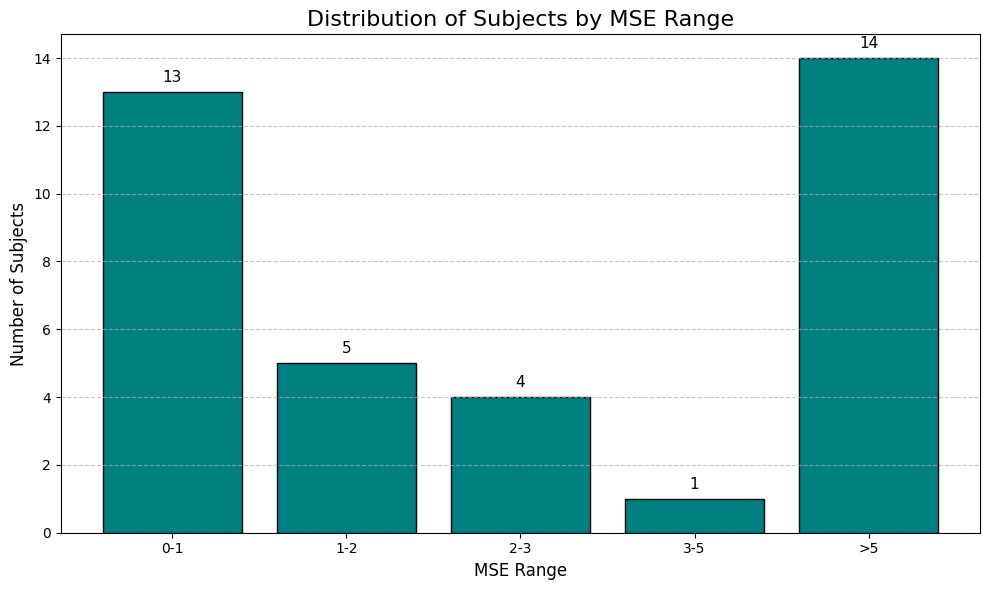

In [15]:
for category, subject_mses in mse_by_category.items():
    print(f"--- MSE in range {category} ---")
    if not subject_mses:
        print("No subjects in this range.")
    else:
        for subject_id, mse in subject_mses.items():
            print(f"  Subject {subject_id}: MSE = {mse:.4f}")
    print("-" * 30)

category_counts = {category: len(subject_mses) for category, subject_mses in mse_by_category.items()}
bins = list(category_counts.keys())
counts = list(category_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(bins, counts, color='teal', edgecolor='black')
plt.title('Distribution of Subjects by MSE Range', fontsize=16)
plt.xlabel('MSE Range', fontsize=12)
plt.ylabel('Number of Subjects', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(counts):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.show()

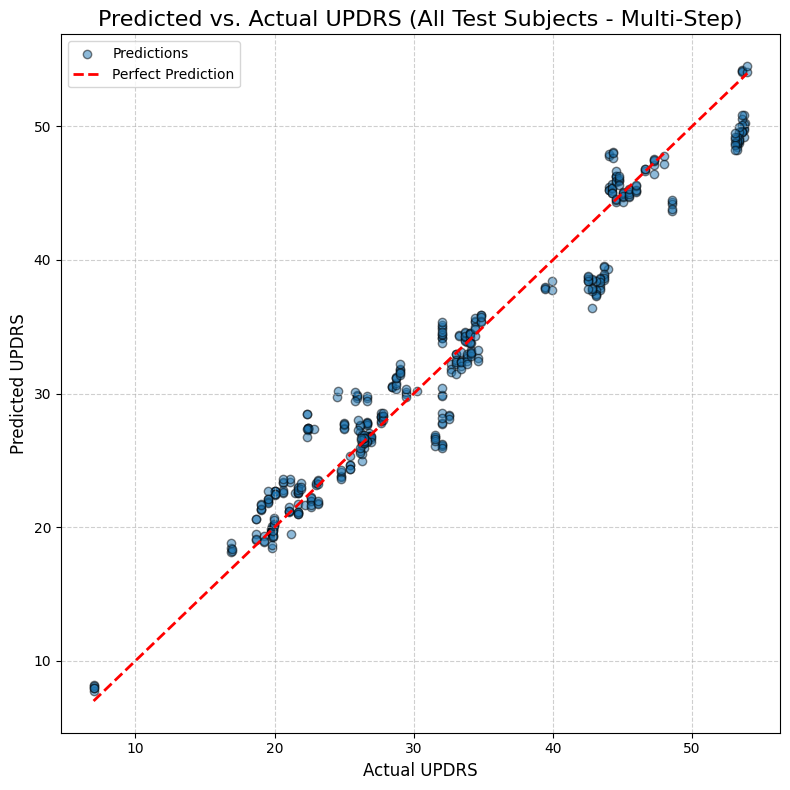

In [16]:
all_preds = []
all_actuals = []

for subject_id, group in scaled_test_df.groupby('subject#'):
    X_subj = group[feature_cols].values
    y_true_scaled = group[target_column].values

    if len(X_subj) < timesteps + prediction_length:
        continue

    for i in range(0, len(X_subj) - timesteps - prediction_length + 1, prediction_length):
        x_input = X_subj[i:i+timesteps]
        x_input = np.expand_dims(x_input, axis=0)

        y_pred_scaled = model.predict(x_input, verbose=0)[0].reshape(-1, 1)
        y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

        actual_vals_scaled = y_true_scaled[i+timesteps:i+timesteps+prediction_length].reshape(-1, 1)
        actual_vals = scaler_y.inverse_transform(actual_vals_scaled).flatten()

        all_preds.extend(y_pred)
        all_actuals.extend(actual_vals)

plt.figure(figsize=(8, 8))
plt.scatter(all_actuals, all_preds, alpha=0.5, edgecolor='k', label='Predictions')
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)], 'r--', lw=2, label='Perfect Prediction')
plt.title("Predicted vs. Actual UPDRS (All Test Subjects - Multi-Step)", fontsize=16)
plt.xlabel("Actual UPDRS", fontsize=12)
plt.ylabel("Predicted UPDRS", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


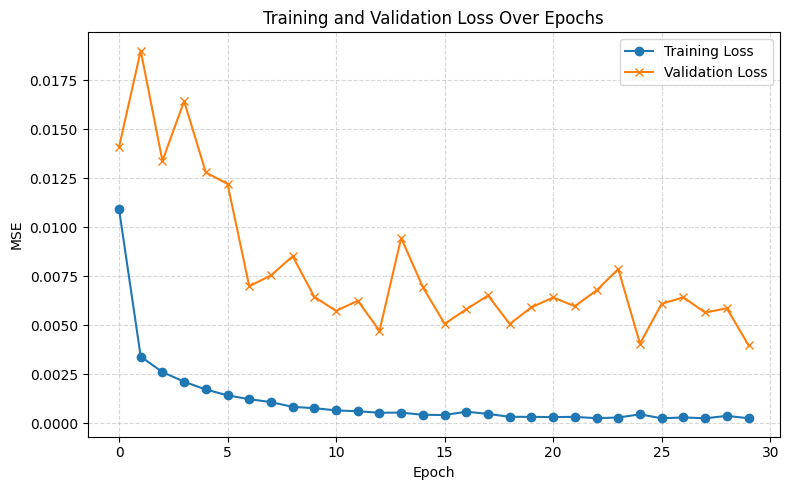

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()